# Introduction to Regression with NN in Tensorfow

There are many definitions for a regression problem, but in this notebook we'll simplify it to predicting a numerical variable based on some other combinations of variables.

In [1]:
# Import tensorflow and check GPU availability
import tensorflow as tf
print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))

2.16.2
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## Creating some data to view and fit

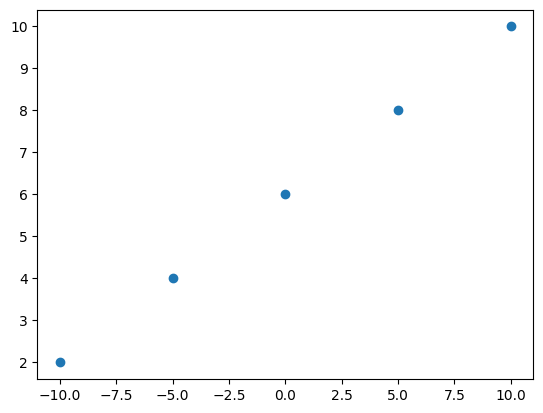

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-10.0, -5.0, 0.0, 5.0, 10.0])

# Create labels
y = np.array([2.0, 4.0, 6.0, 8.0, 10.0])

#Visulaze it
plt.scatter(X,y)

In [3]:
# Convert Numpy arrays into Tensorflow tensors

X = tf.constant(X)
y = tf.constant(y)
X,y

2026-02-09 15:57:00.849511: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3
2026-02-09 15:57:00.849526: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2026-02-09 15:57:00.849530: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.92 GB
2026-02-09 15:57:00.849543: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2026-02-09 15:57:00.849551: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


(<tf.Tensor: shape=(5,), dtype=float64, numpy=array([-10.,  -5.,   0.,   5.,  10.])>,
 <tf.Tensor: shape=(5,), dtype=float64, numpy=array([ 2.,  4.,  6.,  8., 10.])>)

## Steps in modelling with tensorflow

1. **Creating a model**: Define the input and output layers, as well as the hidden layers.
2. **Compilint the model**: Define the loss function, the optimizer and the evaluation metric.
3. **Fitting a model**: Letting the model try to find patterns between the features and labels

In [4]:
# Setting a random seed for reproducebility
tf.random.set_seed(42)

# 1. Create a model using the sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1) # We're only implementing 1 neuron because we only want to predict 1 output value from 1 inupt value
])

"""
#Alternative
model= tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))
"""

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae stands for mean absolute error
             optimizer= tf.keras.optimizers.SGD(), #SGD stands for Stochastic Gradient Descent
         metrics=["mae"])

# 3. Fitting the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)


Epoch 1/5


2026-02-09 15:57:00.995405: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - loss: 6.9677 - mae: 6.9677
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6.8041 - mae: 6.8041
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 6.6405 - mae: 6.6405
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.4769 - mae: 6.4769
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.3133 - mae: 6.3133


In [5]:
# Try and make a prediction with our model
model.predict(np.array([17.0])) # Scalars as inputs are not allowed, the unique valide data structure are arrays

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


array([[-4.0825863]], dtype=float32)

## Improve our model

We can improve our model by altering the steps we took to create a model.

1. **Crearing a model**: Add more layers, increase the number of hidden units(neurons), change the activation function of each layer
2. **Compilin a model**: Change the optimization function or learning rate of the optimization function
3. **Fitting a model**: Fit a model for more epoch or more data.

**As ML scientist the goal is to run as many experiments as possible to identify what works before scaling up the models**

**The learning rate is the most important hyperparameter for NN**

In [6]:
# Setting a random seed for reproducebility
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1) 
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae stands for mean absolute error
             optimizer= tf.keras.optimizers.SGD(), #SGD stands for Stochastic Gradient Descent
             metrics=["mae"])

# 3. Fitting the model (improved version by increasing epoch number)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

# Try and make a prediction with our model
model.predict(np.array([17.0]))

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 12.9348 - mae: 12.9348
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 12.5744 - mae: 12.5744
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 12.2140 - mae: 12.2140
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 11.8536 - mae: 11.8536
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 11.4932 - mae: 11.4932
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 11.1328 - mae: 11.1328
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 10.7724 - mae: 10.7724
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 10.4120 - mae: 10.4120
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 10.0516 - mae: 10.0516
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 9.6912 - mae: 9.6912
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 9.3308 - mae: 9.3308
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 8.9704 - mae: 8.9704
Epoch 13/100
1/1 ━━━━━━━━━━━━━

array([[-0.8006421]], dtype=float32)

In [7]:
# Create a model (improved version with more layers, more neurons and relu activation)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

# Compile the model (improved version with adam optimizer)
model.compile(loss=tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# Fit the model (improved version by increasing the number of epochs)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)



Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step - loss: 6.0000 - mae: 6.0000
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 5.8616 - mae: 5.8616
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 5.7084 - mae: 5.7084
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 5.5376 - mae: 5.5376
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.3482 - mae: 5.3482
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.1395 - mae: 5.1395
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.9105 - mae: 4.9105
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.6607 - mae: 4.6607
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.3892 - mae: 4.3892
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.0953 - mae: 4.0953
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3.7783 - mae: 3.7783
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3.4373 - mae: 3.4373
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/st

In [8]:
#Remember features and values
print(X)
print(y)
# Try and make a prediction with our model
model.predict(np.array([17.0]))

tf.Tensor([-10.  -5.   0.   5.  10.], shape=(5,), dtype=float64)
tf.Tensor([ 2.  4.  6.  8. 10.], shape=(5,), dtype=float64)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


array([[14.440993]], dtype=float32)

## Evaluating a model

In practice, the typical workflow is: 

Build model -> Loop (Fit the model -> Evaluate the model -> Tweak the model) 

It is a good idea to visualize the data, the model, the trainaing of a model and the predictions of the model.

In [9]:
# Make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [10]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

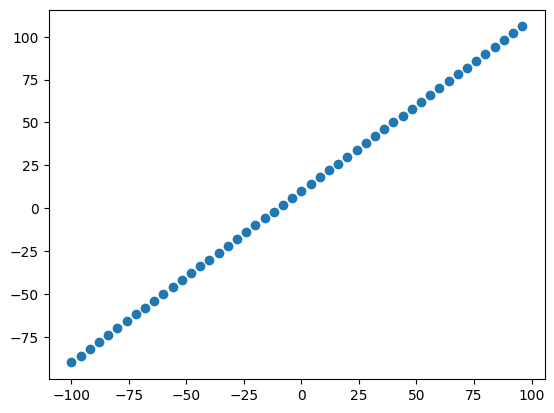

In [11]:
#Visualize the data 
import matplotlib.pyplot as plt 

plt.scatter(X,y)

### Sets 
* **Training set (70-80%)**: The model learns from this data
* **Validation data (10-15%)**: The data the model gets tuned
* **Test set (10-15%)**: Data used for the evaluation of the model

Analogy:
* Training ser: Course materials
* Validation set: Practice exam
* Test set: Final exam

The end goal is to achieve a better generalization (capability of a model to perform well on unseen data)

In [12]:
# Split the data into train and tests sets
X_train = X[:40]
y_train = y[:40] 
X_test = X[40:]
y_test = y[40:]
print(X_train,X_test, y_train,y_test)

tf.Tensor(
[-100  -96  -92  -88  -84  -80  -76  -72  -68  -64  -60  -56  -52  -48
  -44  -40  -36  -32  -28  -24  -20  -16  -12   -8   -4    0    4    8
   12   16   20   24   28   32   36   40   44   48   52   56], shape=(40,), dtype=int32) tf.Tensor([60 64 68 72 76 80 84 88 92 96], shape=(10,), dtype=int32) tf.Tensor(
[-90 -86 -82 -78 -74 -70 -66 -62 -58 -54 -50 -46 -42 -38 -34 -30 -26 -22
 -18 -14 -10  -6  -2   2   6  10  14  18  22  26  30  34  38  42  46  50
  54  58  62  66], shape=(40,), dtype=int32) tf.Tensor([ 70  74  78  82  86  90  94  98 102 106], shape=(10,), dtype=int32)


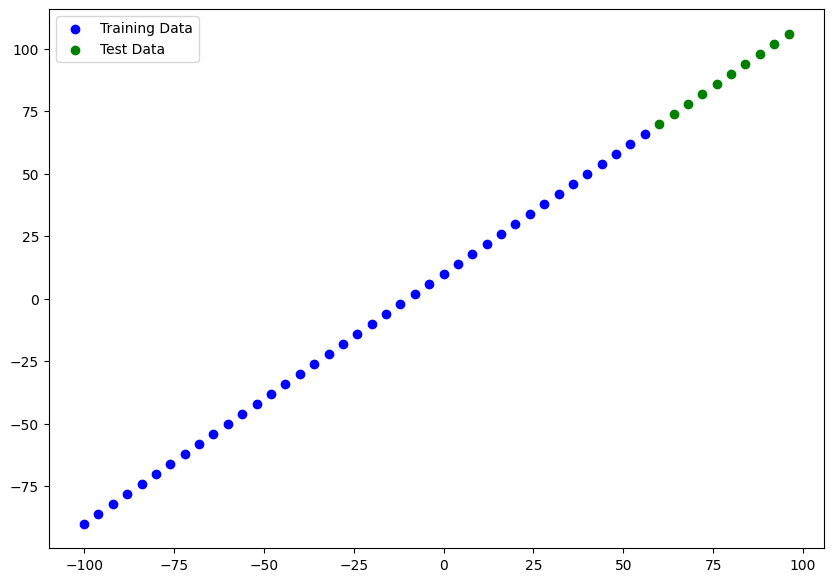

In [13]:
#Visualize the data 
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c="b", label="Training Data")
plt.scatter(X_test, y_test, c="g", label="Test Data")
plt.legend()

In [14]:
# Create a model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model 
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit the model 
# If we instanciate the fit model separately and run it several times these ones will aggregate
model.fit(tf.expand_dims(X_train,axis=-1), y_train,epochs=100) 

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 12.8259 - mae: 12.8259 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 11.2157 - mae: 11.2157
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.1814 - mae: 8.1814
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.8492 - mae: 9.8492
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.1627 - mae: 8.1627
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.8363 - mae: 9.8363
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.1440 - mae: 8.1440
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.8234 - mae: 9.8234
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.1253 - mae: 8.1253
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.8104 - mae: 9.8104
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.1066 - mae: 8.1066
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.7975 - mae: 9.7975
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - 

In [15]:
# Visulize the model
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

* Total params: Total number of parameters in the models (Train and learn)
* Trainable params: Parameters(patterns) the model can update as it trains.
* Non-trainable params: Parameters not updatesd as the model is trained

When we import a model with already learned patterns we want to keep them by freezing those layers and not training them. Important for transfer learining.

### Model improvements

When we want to improve our models it is preferable to implement many **small changes instead of a big change.** Otherwise is too complex to identify which is the root cause of the improvement

In [16]:
# Make a change to improve our model (Adjust hidden layers, optimizer and n_epochs)
# Create a model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile the model 
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), #0.01 Makes the trainaing loss to noisy
              metrics=["mae"])

# Fit the model 
# If we instanciate the fit model separately and run it several times these ones will aggregate
model.fit(tf.expand_dims(X_train,axis=-1), y_train,epochs=1000) # With only 100 epochs is too lees time for the model to learn properly

Epoch 1/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 53.8733 - mae: 53.8733 
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 51.7707 - mae: 51.7707
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 49.6883 - mae: 49.6883
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 47.6118 - mae: 47.6118
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 45.5358 - mae: 45.5358
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 43.4597 - mae: 43.4597
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 41.3828 - mae: 41.3828
Epoch 8/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 39.3045 - mae: 39.3045
Epoch 9/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 37.2241 - mae: 37.2241
Epoch 10/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 35.1407 - mae: 35.1407
Epoch 11/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 33.0587 - mae: 33.0587
Epoch 12/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 30.9976 - mae: 30.9976
Epoch 13/100

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 100)            │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 905 (3.54 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 604 (2.36 KB)

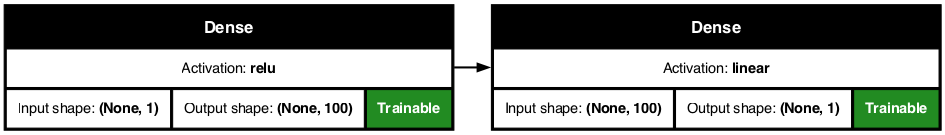

In [17]:
from tensorflow.keras.utils import plot_model
# Get a summary of the model
model.summary()

plot_model(model, show_shapes=True,
           dpi=75,
           rankdir='LR',
           show_layer_activations=True,
           show_trainable=True)

### Visualization our model predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

In [18]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred, y_test # The closer this numbers are the better our model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


(array([[ 70.04212 ],
        [ 74.04489 ],
        [ 78.04765 ],
        [ 82.05042 ],
        [ 86.05319 ],
        [ 90.05596 ],
        [ 94.058716],
        [ 98.06149 ],
        [102.06427 ],
        [106.06703 ]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [19]:
# Create a plotting function 
def plot_predictions(train_data=X_train,
                    test_data=X_test,
                    train_labels=y_train, 
                    test_labels=y_test,
                    predictions=y_pred):
    """
    Plots training data, test data and compares to ground truth labels
    """

    plt.figure(figsize=(10,7))
    #Plot training data 
    plt.scatter(train_data, train_labels, c="b", label="Training data")
    #Plot test data
    plt.scatter(test_data, test_labels, c="g", label="Test data")
    #Plot prediction
    plt.scatter(test_data, predictions, c="r", label="Predictions")
    #Plot legend
    plt.legend()

In [20]:
# Create a model
model_bad = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model 
model_bad.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit the model 
# If we instanciate the fit model separately and run it several times these ones will aggregate
model_bad.fit(tf.expand_dims(X_train,axis=-1), y_train,epochs=100, verbose=0) 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[ 63.274498]
 [ 67.39784 ]
 [ 71.52119 ]
 [ 75.64452 ]
 [ 79.76787 ]
 [ 83.891205]
 [ 88.01455 ]
 [ 92.13789 ]
 [ 96.26123 ]
 [100.384575]] tf.Tensor([ 70  74  78  82  86  90  94  98 102 106], shape=(10,), dtype=int32)


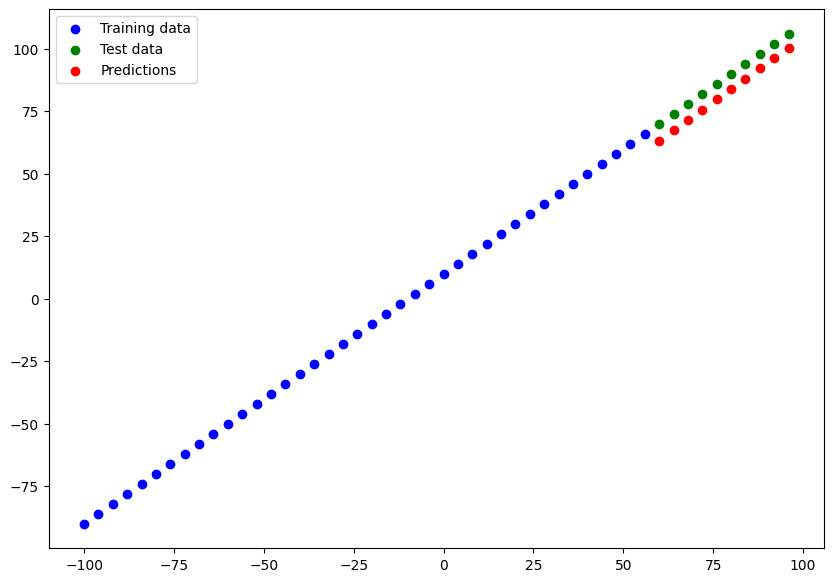

In [21]:
# Perform prediction
y_pred = model_bad.predict(X_test)
print(y_pred, y_test) # The closer this numbers are the better our model

# Visualize prediction
plot_predictions(train_data=X_train,
                    test_data=X_test,
                    train_labels=y_train, 
                    test_labels=y_test,
                    predictions=y_pred)

In [22]:
# Make a change to improve our model (Adjust hidden layers, optimizer and n_epochs)
# Create a model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile the model 
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), #0.01 Makes the trainaing loss to noisy
              metrics=["mae"])

# Fit the model 
# If we instanciate the fit model separately and run it several times these ones will aggregate
model.fit(tf.expand_dims(X_train,axis=-1), y_train,epochs=1000, verbose=0) # With only 100 epochs is too lees time for the model to learn properly

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[ 69.489   ]
 [ 73.45491 ]
 [ 77.42082 ]
 [ 81.386734]
 [ 85.35265 ]
 [ 89.31856 ]
 [ 93.28447 ]
 [ 97.2504  ]
 [101.21631 ]
 [105.18221 ]] tf.Tensor([ 70  74  78  82  86  90  94  98 102 106], shape=(10,), dtype=int32)


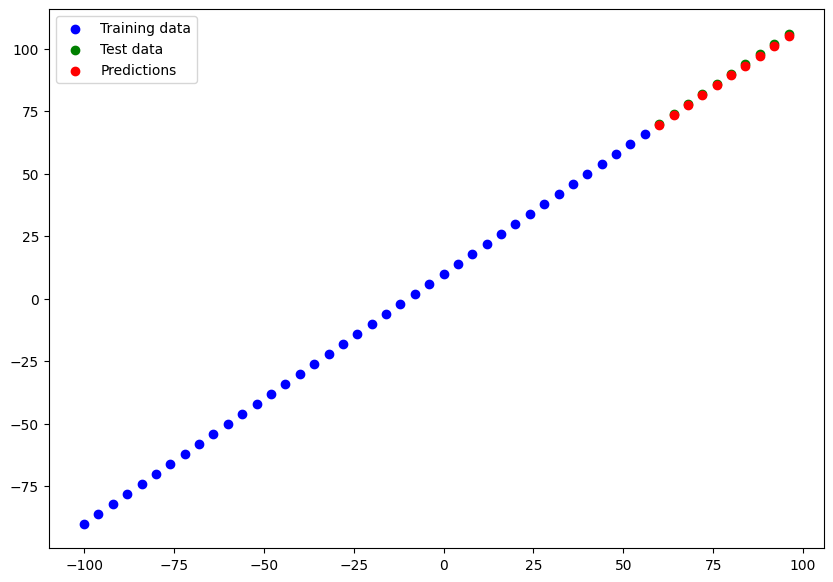

In [23]:
# Perform prediction
y_pred = model.predict(X_test)
print(y_pred, y_test) # The closer this numbers are the better our model

# Visualize prediction
plot_predictions(train_data=X_train,
                    test_data=X_test,
                    train_labels=y_train, 
                    test_labels=y_test,
                    predictions=y_pred)

### Evaluating our model's prediction with regression evaluation metrics

Depending on the problem there will be different evaluation metrics to evaluate your model's performance

On regression problems, 2 of the main metrics are:
* **MAE (Mean Absolute Error)**: Useful for any regression problems
* **MSE (Mean Square Error)**: Useful when larger errors are more significant than smaller ones
* **Huber**: Combination of MSE and MAE (Less sensitive than MSE)

In [24]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.6644 - mae: 0.6644


[0.6643936038017273, 0.6643936038017273]

In [25]:
print(y_test, y_pred,"\n") # The tensors has different shape, a conversion is required

# Calculate MAE
print(tf.keras.losses.MAE(y_test,
                          tf.reshape(y_pred, [1,10]))) 

tf.Tensor([ 70  74  78  82  86  90  94  98 102 106], shape=(10,), dtype=int32) [[ 69.489   ]
 [ 73.45491 ]
 [ 77.42082 ]
 [ 81.386734]
 [ 85.35265 ]
 [ 89.31856 ]
 [ 93.28447 ]
 [ 97.2504  ]
 [101.21631 ]
 [105.18221 ]] 

tf.Tensor([0.6643936], shape=(1,), dtype=float32)


In [26]:
# Calculate MSE

print(tf.keras.losses.MSE(y_test,
                         tf.reshape(y_pred,[1,10])))

tf.Tensor([0.45100456], shape=(1,), dtype=float32)


In [49]:
# Make some functions to resuse MAE and MSE

def mae(test_data= y_test, predictions= y_pred):
    value = tf.keras.losses.MAE(test_data,predictions)
    print("MAE:",value)
    return value

def mse(test_data= y_test, predictions= y_pred):
    value = tf.keras.losses.MSE(test_data,predictions)
    print("MSE:",value)
    return value

def huber(test_data= y_test, predictions= y_pred):
    loss_fn = tf.keras.losses.Huber(delta=1.0)
    value = loss_fn(test_data,predictions)
    print("Huber:",value)
    return value

In [28]:
mae(y_test,tf.reshape(y_pred,[1,10]))
mse(y_test,tf.reshape(y_pred,[1,10]))
huber(y_test,tf.reshape(y_pred,[1,10]))

MAE: tf.Tensor([0.6643936], shape=(1,), dtype=float32)
MSE: tf.Tensor([0.45100456], shape=(1,), dtype=float32)
Huber: tf.Tensor(0.22550228, shape=(), dtype=float32)


### Running experiments to improve out model
1. Get more data
2. Make the model larger (more layers or more hidden units in each layer)
3. Train for longer

#### 3 Modelling experiments:
1. model 1: 1 Dense layer trained for 100 epochs
2. model_2: 2 Dense layers trained for 100 epochs
3. model_3: 2 Dense layers trained for 500 epochs

In [76]:
# Models creation
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

#Models compile
model_1.compile(loss='mae',
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])

model_2.compile(loss='mae',
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])

model_3.compile(loss='mae',
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])

# Models fitting
model_1.fit(tf.expand_dims(X_train, axis=-1),y_train, epochs=100, verbose=0)
model_2.fit(tf.expand_dims(X_train, axis=-1),y_train, epochs=100, verbose=0)
model_3.fit(tf.expand_dims(X_train, axis=-1),y_train, epochs=100, verbose=0)

#Predictions 
y_pred_1 = model_1.predict(X_test)
y_pred_2 = model_2.predict(X_test)
y_pred_3 = model_3.predict(X_test)

# Evalute models
mae_1 = mae(y_test,tf.reshape(y_pred_1,[1,10])) 
mae_2 = mae(y_test,tf.reshape(y_pred_2,[1,10]))
mae_3 = mae(y_test,tf.reshape(y_pred_3,[1,10]))
print("\n")
mse_1 = mse(y_test,tf.reshape(y_pred_1,[1,10])) 
mse_2 = mse(y_test,tf.reshape(y_pred_2,[1,10]))
mse_3 = mse(y_test,tf.reshape(y_pred_3,[1,10]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
MAE: tf.Tensor([6.1616144], shape=(1,), dtype=float32)
MAE: tf.Tensor([43.103565], shape=(1,), dtype=float32)
MAE: tf.Tensor([39.575783], shape=(1,), dtype=float32)


MSE: tf.Tensor([38.09225], shape=(1,), dtype=float32)
MSE: tf.Tensor([1884.0149], shape=(1,), dtype=float32)
MSE: tf.Tensor([1587.3328], shape=(1,), dtype=float32)


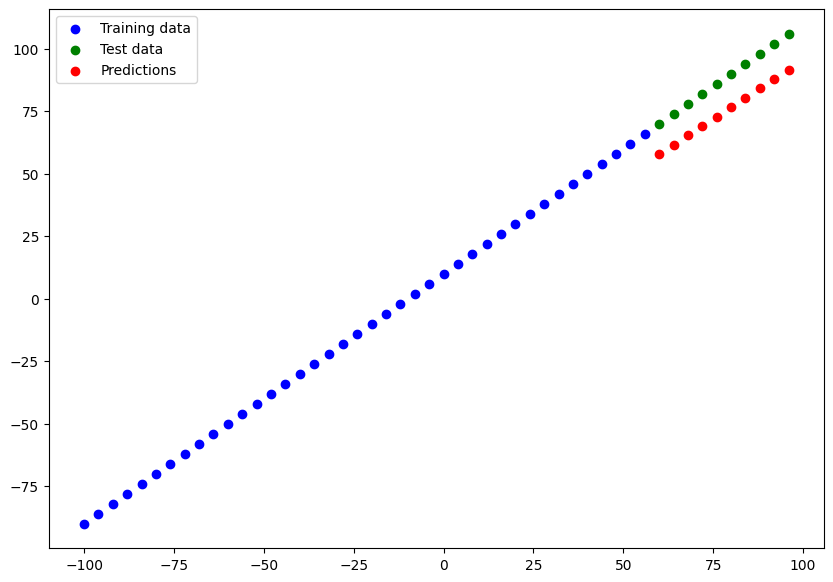

In [75]:
#Visulize data experiment 1
plot_predictions(train_data=X_train,
                    test_data=X_test,
                    train_labels=y_train, 
                    test_labels=y_test,
                    predictions=y_pred_1)

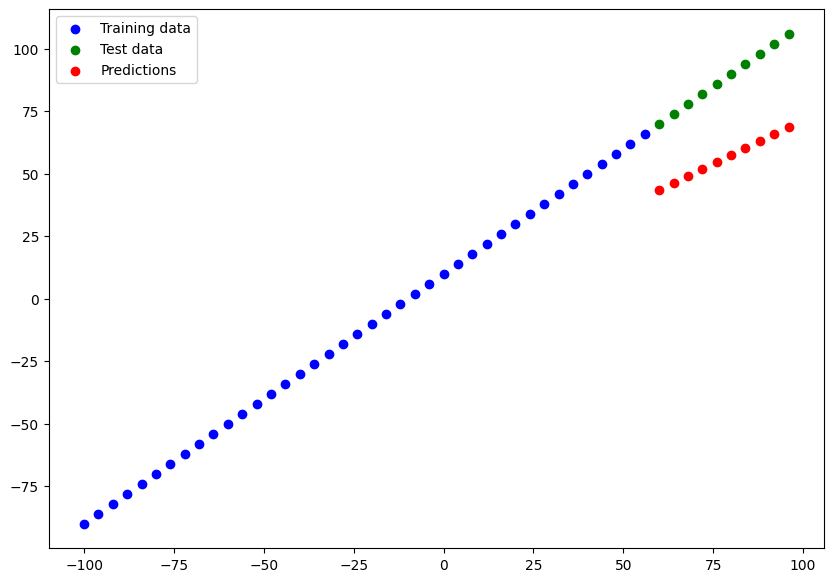

In [32]:
#Visulize data experiment 2
plot_predictions(train_data=X_train,
                    test_data=X_test,
                    train_labels=y_train, 
                    test_labels=y_test,
                    predictions=y_pred_2)

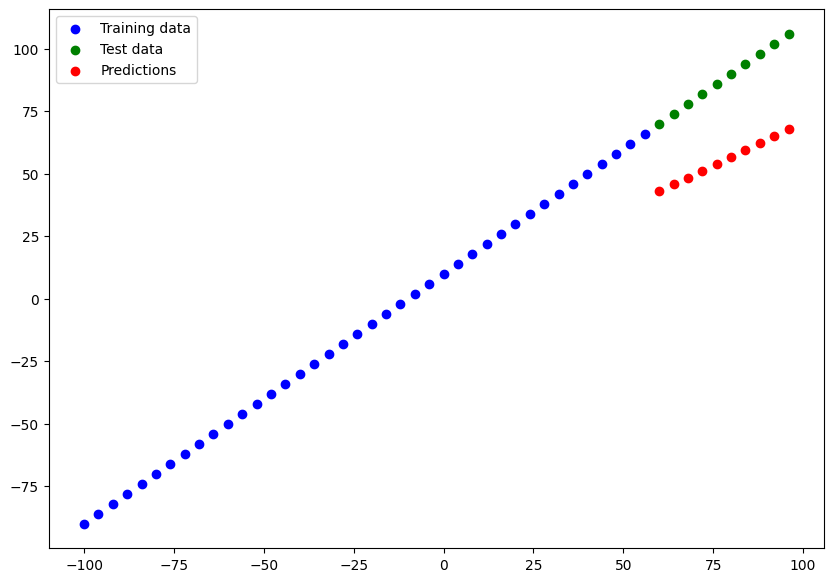

In [33]:
#Visulize data experiment 3
plot_predictions(train_data=X_train,
                    test_data=X_test,
                    train_labels=y_train, 
                    test_labels=y_test,
                    predictions=y_pred_3)

### Comparing results of our experiments
One of your main goals shourl be to minimize betweeen the experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out that does work. 

Remember the ML practitioner's motto: **Experiment,experiment,experiment...**

One really good habit in ML modelling is to track the results of your experiments. Luckly, there are tools to help us, such as:
* Tensorboard(component of tensorflow): Helps modelling experiments
* Wheights & Biases: Helps tracking all kinds of ML experiments(plug and play with Tensorboard) 


In [60]:
# Use a pandas DataFrame to compare our models
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]
                ]

all_results = pd.DataFrame(model_results, columns=["model", "mae","mse"]) 
print(all_results)

     model          mae          mse
0  model_1  [5.4996834]  [30.454138]
1  model_2   [36.94995]  [1383.0131]
2  model_3    [8.43601]   [76.79204]


### Save our models

Currently the models trained only exists as Python objects. 

Saving our models allows us to use them outside our training environment, such as web app.

There are 2 main formats:
1. SaveModel
2. HDF5

In [77]:
# Save the model in SaveModel format 
model_1.save("./models/best_SaveModel.keras") # the .keras extension is reqiured
# Save model in HDF5
model_1.save("./models/best_HDF5.h5")

In [78]:
# Load in the SavedModel model
loaded_sm = tf.keras.models.load_model("./models/best_SaveModel.keras")
loaded_sm.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [82]:
# Compare model_1 predictions with SavedModel format model predictions
pred_1 = model_1.predict(X_test)
pred_load_1 = loaded_sm.predict(X_test)
print (pred_1,pred_load_1)
pred_1 == pred_load_1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
[[ 63.280586]
 [ 67.40454 ]
 [ 71.528496]
 [ 75.65245 ]
 [ 79.776405]
 [ 83.90036 ]
 [ 88.02432 ]
 [ 92.14828 ]
 [ 96.27223 ]
 [100.39619 ]] [[ 63.280586]
 [ 67.40454 ]
 [ 71.528496]
 [ 75.65245 ]
 [ 79.776405]
 [ 83.90036 ]
 [ 88.02432 ]
 [ 92.14828 ]
 [ 96.27223 ]
 [100.39619 ]]


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])